# Lecture 1: An introductory example on the Gambler's Ruin

In this <i>Jupyter Notebook</i> we want to estimate the ruin probability of the gambler by running simulations.

We start with loading necessary packages and rename them:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Moreover, it might be convenient to define global parameters:

In [3]:
successProbability = 18/37
initialCapital = 10
targetCapital = 80

## Step 1: Simulate realisations (paths) of the gambler's capital

We may want to initialize the random generator to be able to reproduce the results (i.e. the random sampling):

In [3]:
#np.random.seed(1)

Simulate a possible path and plot it:

In [4]:
gamblersCapital = initialCapital
gamblersCapitalPath = []
gamblersCapitalPath.append(gamblersCapital)

while gamblersCapital > 0 and gamblersCapital < targetCapital:
    uniformSample = np.random.random_sample(1)
    
    if uniformSample < successProbability:
        gamblersCapital = gamblersCapital + 1
    else:
        gamblersCapital = gamblersCapital - 1

    gamblersCapitalPath.append(gamblersCapital)

In [5]:
print(gamblersCapitalPath)

[10, 11, 10, 9, 10, 11, 12, 11, 12, 11, 10, 9, 8, 9, 8, 9, 8, 7, 6, 5, 6, 5, 6, 7, 8, 7, 6, 7, 6, 5, 4, 5, 6, 5, 4, 5, 6, 5, 4, 3, 4, 5, 4, 5, 4, 3, 4, 3, 4, 5, 4, 3, 4, 5, 4, 5, 6, 5, 6, 5, 4, 5, 4, 3, 4, 5, 6, 5, 6, 7, 8, 7, 8, 9, 8, 7, 6, 5, 4, 3, 2, 3, 2, 3, 4, 5, 4, 5, 6, 7, 6, 7, 8, 9, 10, 9, 8, 9, 10, 11, 10, 9, 10, 11, 10, 9, 10, 9, 8, 7, 6, 7, 6, 5, 4, 5, 4, 5, 4, 3, 2, 1, 0]


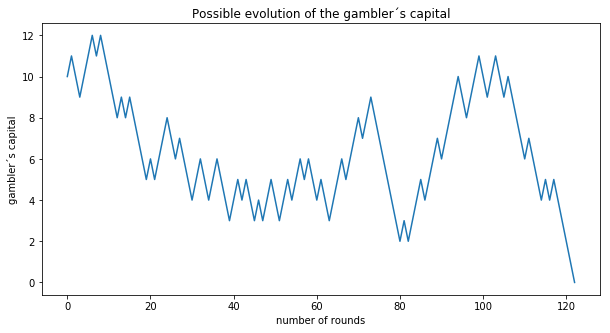

In [6]:
plt.figure(figsize=(10,5))
plt.plot(gamblersCapitalPath)
plt.xlabel('number of rounds')
plt.ylabel('gambler´s capital')
plt.title('Possible evolution of the gambler´s capital')
plt.show()

Define a simulator function to sample paths:

In [7]:
def samplePath(init, target, p):
    
    gamblersCapital = init
    gamblersCapitalPath = []
    gamblersCapitalPath.append(gamblersCapital)

    while gamblersCapital > 0 and gamblersCapital < target:
        uniformSample = np.random.random_sample(1)
    
        if uniformSample < p:
            gamblersCapital = gamblersCapital + 1
        else:
            gamblersCapital = gamblersCapital - 1

        gamblersCapitalPath.append(gamblersCapital)
    
    return gamblersCapitalPath

In [13]:
testPath = samplePath(initialCapital,targetCapital,successProbability)
print(testPath)

[10, 11, 10, 11, 10, 11, 10, 11, 12, 11, 10, 9, 8, 7, 6, 5, 6, 7, 8, 9, 10, 9, 10, 11, 12, 13, 14, 13, 12, 13, 14, 13, 12, 13, 12, 11, 12, 13, 14, 15, 14, 15, 16, 17, 16, 17, 16, 17, 18, 19, 20, 21, 20, 21, 22, 21, 20, 19, 20, 19, 18, 19, 20, 21, 22, 23, 22, 23, 24, 25, 24, 23, 24, 25, 26, 27, 26, 25, 24, 23, 22, 21, 22, 21, 20, 19, 18, 19, 20, 21, 22, 23, 22, 21, 22, 21, 20, 21, 22, 21, 22, 21, 20, 19, 20, 21, 22, 23, 24, 25, 26, 25, 24, 23, 22, 21, 22, 21, 22, 23, 24, 23, 22, 21, 22, 21, 20, 19, 18, 17, 18, 17, 18, 17, 16, 15, 16, 17, 16, 15, 16, 17, 16, 17, 16, 17, 16, 17, 16, 17, 18, 19, 18, 17, 18, 17, 18, 17, 16, 17, 18, 17, 16, 17, 18, 19, 20, 19, 18, 19, 18, 17, 16, 15, 16, 17, 16, 15, 16, 15, 14, 13, 12, 11, 12, 13, 14, 13, 14, 15, 16, 17, 16, 17, 16, 15, 14, 15, 14, 15, 14, 13, 12, 11, 12, 11, 12, 11, 10, 11, 10, 9, 10, 11, 12, 11, 12, 11, 10, 11, 12, 13, 14, 15, 14, 15, 16, 17, 18, 17, 16, 15, 14, 15, 16, 15, 16, 15, 14, 13, 12, 11, 12, 11, 12, 13, 12, 11, 12, 11, 10, 11, 12

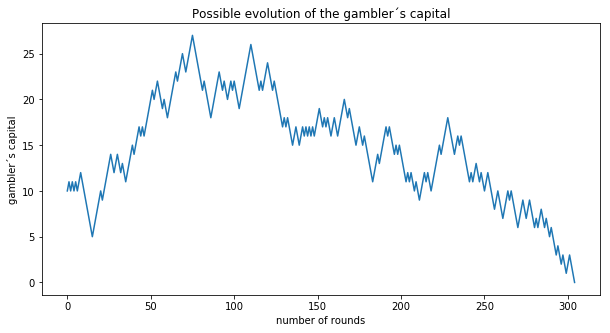

In [14]:
plt.figure(figsize=(10,5))
plt.plot(testPath)
plt.xlabel('number of rounds')
plt.ylabel('gambler´s capital')
plt.title('Possible evolution of the gambler´s capital')
plt.show()

Simulate many paths and plot them:

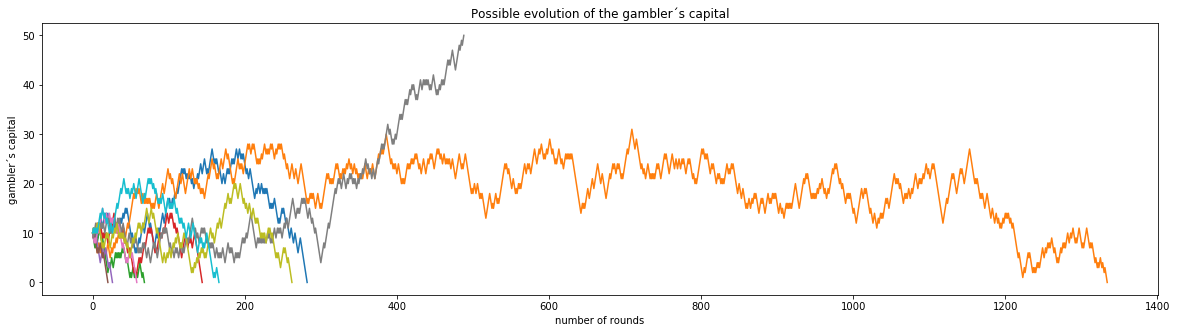

In [16]:
numberOfSimulations = 10

plt.figure(figsize=(20,5))
plt.xlabel('number of rounds')
plt.ylabel('gambler´s capital')
plt.title('Possible evolution of the gambler´s capital')

for i in range(numberOfSimulations):
    plt.plot(samplePath(initialCapital,targetCapital,successProbability))
plt.show()

## Step 2: Estimate ruin probability via simulation

Run many simulations and count the number of paths where the gambler runs bankrupt

In [17]:
numberOfSimulations = 1000

countRuinEvents = 0

for i in range(numberOfSimulations):
    sample = samplePath(initialCapital,targetCapital,successProbability)
    
    if sample[len(sample)-1] == 0:
        countRuinEvents = countRuinEvents + 1

In [18]:
countRuinEvents

944

A simple estimator for the ruin probability is given by

$$\text{ruin probability} \approx \frac{\text{number of paths with ruin}}{\text{total number $N$ of simulated paths}}$$

We will see later in class by the so-called <b>Strong Law of Large Numbers (SLLN)</b> that this intuitively sensible estimation actually approximates the desired probabilty arbitrarily well if we have a sufficiently large number of samples, i.e., $N \rightarrow \infty$ ! 

In [19]:
countRuinEvents/numberOfSimulations

0.944

Check convergence of the estimated value for number of simulations $n\rightarrow \infty$:

In [20]:
sampleSizes = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000] 

countRuinEvents = np.zeros(len(sampleSizes))
k = 0

for size in sampleSizes:
    for i in range(size):
        sample = samplePath(initialCapital,targetCapital,successProbability)
    
        if sample[len(sample)-1] == 0:
            countRuinEvents[k] = countRuinEvents[k] + 1
    k = k + 1

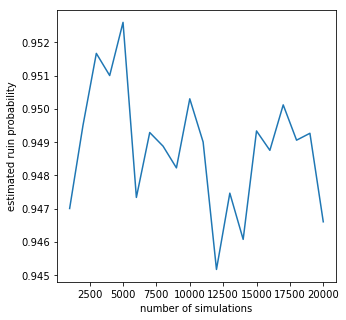

In [21]:
plt.figure(figsize=(5,5))
plt.plot(sampleSizes,countRuinEvents/sampleSizes)
plt.xlabel('number of simulations')
plt.ylabel('estimated ruin probability')
plt.show()

## Step 3: Check with true formula

In fact, later in class we will show that we can compute the gambler's ruin probability <b>exactly</b>!

Let $k$ denote the initial capital, $K$ the target capital and $p$ the success probability in one round. Then the ruin probability $R(k)$ as a function of the initial capital $k \in \{1,\ldots,K-1\}$ is given by

$$ R(k) = \frac{\left(\frac{1-p}{p} \right)^k - \left(\frac{1-p}{p} \right)^K}{1-\left(\frac{1-p}{p} \right)^K} \qquad \text{for } p \neq \frac{1}{2},$$

and

$$ R(k) = 1 - \frac{k}{K} \qquad \text{for } p = \frac{1}{2}.$$




In [4]:
def ruinProbability(initC, targetC, p):
    return ( ((1-p)/p)**initC - ((1-p)/p)**targetC ) / (1 - ((1-p)/p)**targetC)  

In [5]:
ruinProbability(initialCapital,targetCapital,successProbability)

0.990385819236669

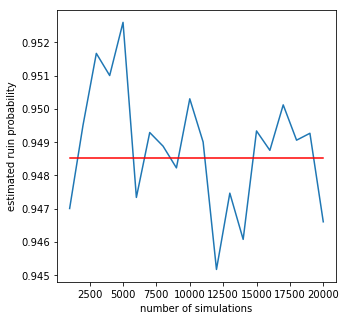

In [24]:
plt.figure(figsize=(5,5))
plt.xlabel('number of simulations')
plt.ylabel('estimated ruin probability')
plt.plot(sampleSizes,countRuinEvents/sampleSizes)
plt.plot(sampleSizes,np.repeat(ruinProbability(initialCapital,targetCapital,successProbability),len(sampleSizes)),color='red')
plt.show()